In [2]:
# by Joh Schoeneberg 2018
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#pyLattice modules / functions
import pylattice
import pylattice.functions.InputProcessing as inproc
import pylattice.functions.TiffProcessing as tiffproc
import pylattice.classes.Track as Track

# input data

In [3]:
path = '/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/'


filepath = path+'_inputParameters.csv'
print(filepath)
inputParameters = pd.read_csv(filepath,names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")


slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))

/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/_inputParameters.csv


In [4]:
slave_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(path+inputDataFolder,slave_uniqueFilenameString)
master_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(path+inputDataFolder,master_uniqueFilenameString)

--- folder searched in: /Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./
--- example of files found: cropped_488_pm50px_maxAmpl_0000.tif
--- number of files found: 10
--- folder searched in: /Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./
--- example of files found: cropped_560_pm50px_maxAmpl_0000.tif
--- number of files found: 10


/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/.//cropped_560_pm50px_maxAmpl_0000.tif
(100, 100, 100)


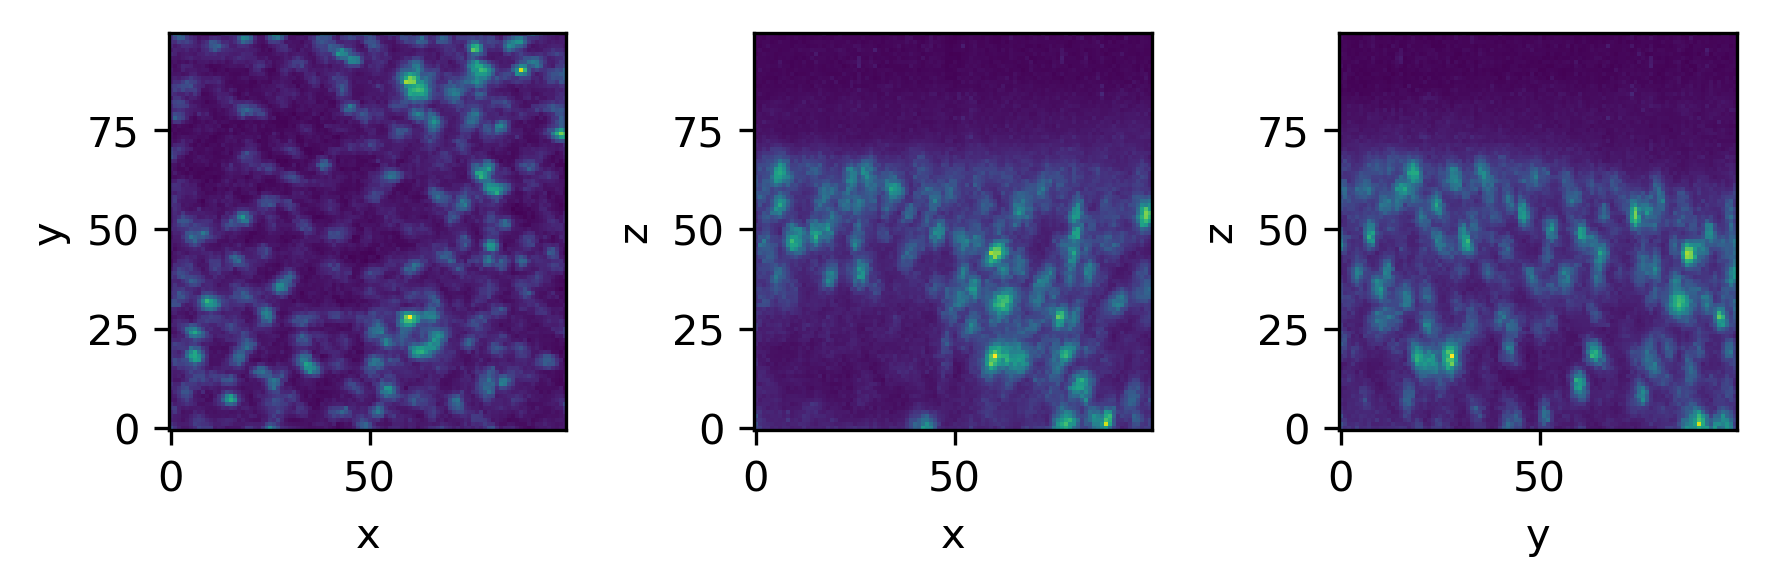

In [5]:
# read the image from where the detections come from
frameId = 0

filepath = path+inputDataFolder+'/'+master_filesOfInterest[frameId]
print(filepath)
latticeMovieFrame = skimage.external.tifffile.imread(filepath)
latticeMovieFrame_shape = latticeMovieFrame.shape
print(latticeMovieFrame_shape)

tiffproc.maxIntensityProjection(latticeMovieFrame)

In [6]:
# read the raw csv data for further processing

filepath = path+outputDataFolder+'/'+trackingCsvFilenameProcessed
print(filepath)


data = pd.read_csv(filepath,header=0)
data.columns = ["trackId","tracklength","time[s]","frameId","lifetime","catIdx","m_x",'m_y',"m_z","m_A","m_c","m_pval_Ar","s_x",'s_y',"s_z","s_A","s_c","s_pval_Ar"]
trackIds = data.drop_duplicates(subset='trackId')['trackId'].values

dataUnique = data.drop_duplicates(subset='trackId')

lengthTreshold = 5 #frames
trackIdsLong = (data[data['tracklength'] > lengthTreshold]).drop_duplicates(subset='trackId')['trackId'].values
longTracks = data[data['tracklength'] > lengthTreshold]
longTracks

print("total number of tracks: {}\nunique tracks: {}\nlongtracks (len>{}) {}".format(len(data),len(dataUnique),lengthTreshold,len(longTracks.drop_duplicates(subset='trackId'))))

/Users/johannesschoeneberg/Dropbox/pylattice_testData/imaging_data/./output/trackedFeaturesProcessed.csv
total number of tracks: 1015
unique tracks: 205
longtracks (len>5) 75


# select subset

In [7]:
# select a subset of the tracks, e.g. for displaying only long tracks

allTrackIdsLrgrThanFour = (data[data['tracklength'] >= 4]).drop_duplicates(subset='trackId')['trackId'].values
allTrackIds = np.unique(data['trackId'].values)
cat_Ia_Tracks = np.unique(data[data['catIdx'] == 1]['trackId'])
cat_Ia_Tracks_long = np.unique(data[((data['catIdx'] == 1) & (data['tracklength'] > 4))]['trackId'])
cat_Ib_Tracks = np.unique(data[data['catIdx'] == 2]['trackId'])
cat_Ic_Tracks = np.unique(data[data['catIdx'] == 3]['trackId'])
cat_Id_Tracks = np.unique(data[data['catIdx'] == 4]['trackId'])
cat_IIa_Tracks = np.unique(data[data['catIdx'] == 5]['trackId'])
cat_IIb_Tracks = np.unique(data[data['catIdx'] == 6]['trackId'])
cat_IIc_Tracks = np.unique(data[data['catIdx'] == 7]['trackId'])
cat_IId_Tracks = np.unique(data[data['catIdx'] == 8]['trackId'])


print('len(allTrackIdsLrgrThanFour)/len(allTrackIds)')
print(str(len(allTrackIdsLrgrThanFour))+'/'+str(len(allTrackIds)))
print()
print(allTrackIdsLrgrThanFour)
print('/')
print(allTrackIds)
print()

len(allTrackIdsLrgrThanFour)/len(allTrackIds)
106/205

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106]
/
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 

In [8]:
import re
def parseCutString(string):
    result = []
    #pattern match the indexing string
    chunks = re.findall("\\[[0-9]+,[0-9]+\\]",string)
    for chunk in chunks:
        indexes = re.findall("[0-9]+",chunk)
        if(len(indexes)==2):
            result.append([int(indexes[0]),int(indexes[1])])
        else:
            print("error: index \""+indexes+"\" cannot be parsed")

    return result

In [9]:
# align them all to the max

In [11]:

maxIdxs = []
for trackId in allTrackIdsLrgrThanFour:
    track = track = data[data['trackId'] == trackId]
    maxIdx = np.argmax(track['s_A'].values)
    maxIdxs.append(maxIdx)
maxIdxs = np.array(maxIdxs)
print(maxIdxs)

[0 8 8 9 6 1 4 1 8 5 0 1 1 7 5 9 7 4 7 6 8 0 5 0 0 2 0 0 6 0 6 6 6 0 7 2 3
 1 6 6 0 4 2 3 7 3 3 0 2 5 3 6 2 4 6 4 5 0 1 4 6 1 2 0 4 4 4 3 5 0 1 4 1 5
 5 3 3 4 1 1 1 2 0 0 0 4 4 0 0 0 0 2 2 2 1 1 1 3 3 1 0 1 0 1 1 1]


In [12]:
#lifetimeCohorts = [[0, 9], [9,18],[18,27],[27,50]]
lifetimeCohorts = [[0, 6], [6,12],[12,18],[18,50]]

In [22]:
# data preprocessing

# take only those tracks that belong to the cohort:

#initialize the trackId array sorted by lifetime cohort
trackIdsAssignedToCohorts = []
for i in range(0,len(lifetimeCohorts)):
    trackIdsAssignedToCohorts.append(np.array([]))


trackIdsUsed = allTrackIdsLrgrThanFour

for trackId in trackIdsUsed:
    track = data[data['trackId'] == trackId]
    tracklength = track['tracklength'].values[0]
    m_intensity = track['m_A'].values.astype(float)
    s_intensity = track['s_A'].values.astype(float)
    maxIdx = np.argmax(s_intensity)
    # only include those tracks that do not have the dynamin peak in the first three frames
    if(maxIdx >3):
#    if(True):
    
        for i in range(0,len(lifetimeCohorts)):
        
            if((tracklength >lifetimeCohorts[i][0]) & (tracklength <lifetimeCohorts[i][1])):
                trackIdsAssignedToCohorts[i] = np.append(trackIdsAssignedToCohorts[i],trackId)
        
trackIdsAssignedToCohorts = np.array(trackIdsAssignedToCohorts)
print(trackIdsAssignedToCohorts)
for cohortIdArray in trackIdsAssignedToCohorts:
    print(len(cohortIdArray))

[array([ 81.,  82.,  84.,  86.])
 array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  13.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  23.,  24.,  26.,  27.,  28.,
        29.,  30.,  31.,  33.,  35.,  37.,  39.,  40.,  41.,  45.,  52.,
        56.,  57.,  60.,  61.,  62.,  63.,  75.])
 array([], dtype=float64) array([], dtype=float64)]
4
40
0
0


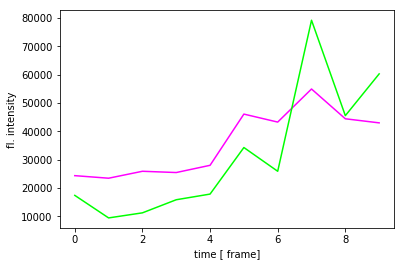

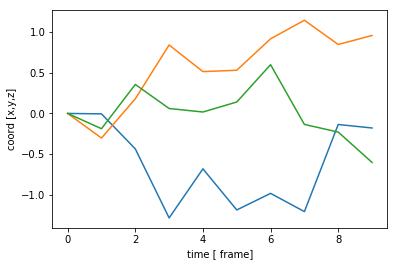

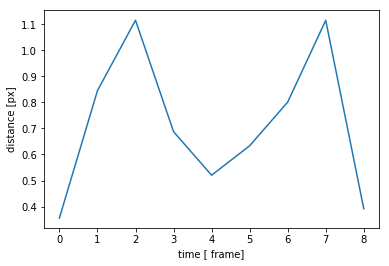

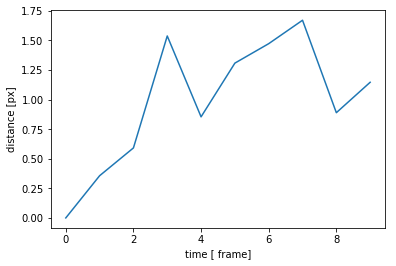

In [23]:
trackId = 6

track = data[data['trackId'] == trackId]
tracklength = track['tracklength'].values[0]
m_intensity = track['m_A'].values.astype(float)
s_intensity = track['s_A'].values.astype(float)
m_x = track['m_x'].values.astype(float)
m_y = track['m_y'].values.astype(float)
m_z = track['m_z'].values.astype(float)

plt.plot(m_intensity, c='magenta')
plt.plot(s_intensity, c='lime')
plt.ylabel('fl. intensity')
plt.xlabel('time [ frame]')
plt.show()

plt.plot(m_x-m_x[0])
plt.plot(m_y-m_y[0])
plt.plot(m_z-m_z[0])
plt.ylabel('coord [x,y,z]')
plt.xlabel('time [ frame]')
plt.show()

distances = []
for i in range(1,len(track)):
    v1 = np.array([m_x[i-1],m_y[i-1],m_z[i-1]])
    v2 = np.array([m_x[i],m_y[i],m_z[i]])
    dist = np.linalg.norm(v2-v1)
    distances.append(dist)
distances = np.array(distances)
plt.plot(distances)
plt.ylabel('distance [px]')
plt.xlabel('time [ frame]');
plt.show()

distanceToStart = []
for i in range(0,len(track)):
    v1 = np.array([m_x[0],m_y[0],m_z[0]])
    v2 = np.array([m_x[i],m_y[i],m_z[i]])
    dist = np.linalg.norm(v2-v1)
    distanceToStart.append(dist)
distanceToStart = np.array(distanceToStart)

plt.plot(distanceToStart)
plt.ylabel('distance [px]')
plt.xlabel('time [ frame]');

In [24]:
def createBufferForDistances(listOfTrackIdsAssignedToCohort,backgroundIntensity=0):


    trackIdArray = listOfTrackIdsAssignedToCohort
    
    m_buffer = []
    s_buffer = []
    
    bufferSize = 200
    bufferZero = 100
    
    m_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity)
    s_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity)
    
    
    #for i in range(0,bufferSize):
    #    m_buffer.append([])
    #    s_buffer.append([])
        
    counter = 0
    
    for trackId in trackIdArray:
        track = data[data['trackId'] == trackId]
        tracklength = track['tracklength'].values[0]
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        
        m_x = track['m_x'].values.astype(float)
        m_y = track['m_y'].values.astype(float)
        m_z = track['m_z'].values.astype(float)       
        m_distances = []
        for i in range(1,len(track)):
            v1 = np.array([m_x[i-1],m_y[i-1],m_z[i-1]])
            v2 = np.array([m_x[i],m_y[i],m_z[i]])
            dist = np.linalg.norm(v2-v1)
            m_distances.append(dist)
        m_distances = np.array(m_distances)
        
        m_distancesToStart = []
        for i in range(0,len(track)):
            v1 = np.array([m_x[0],m_y[0],m_z[0]])
            v2 = np.array([m_x[i],m_y[i],m_z[i]])
            dist = np.linalg.norm(v2-v1)
            m_distancesToStart.append(dist)
        m_distancesToStart = np.array(m_distancesToStart)
        
        s_x = track['s_x'].values.astype(float)
        s_y = track['s_y'].values.astype(float)
        s_z = track['s_z'].values.astype(float)       
        s_distances = []
        for i in range(1,len(track)):
            v1 = np.array([s_x[i-1],s_y[i-1],s_z[i-1]])
            v2 = np.array([s_x[i],s_y[i],s_z[i]])
            dist = np.linalg.norm(v2-v1)
            s_distances.append(dist)
        s_distances = np.array(s_distances)
        
        s_distancesToStart = []
        for i in range(0,len(track)):
            v1 = np.array([s_x[0],s_y[0],s_z[0]])
            v2 = np.array([s_x[i],s_y[i],s_z[i]])
            dist = np.linalg.norm(v2-v1)
            s_distancesToStart.append(dist)
        s_distancesToStart = np.array(s_distancesToStart)
        
        maxIdx = np.argmax(s_intensity)
        
    
        for i in range(0,len(m_distances)):
            if(not np.isnan(m_intensity[i])):
                m_buffer[counter][bufferZero-maxIdx+i]=(m_distancesToStart[i])
        for i in range(0,len(s_distances)):
            if(not np.isnan(s_intensity[i])):
                s_buffer[counter][bufferZero-maxIdx+i]=(s_distancesToStart[i])
           
                
        counter = counter+1;
    
    
    return (m_buffer,s_buffer)


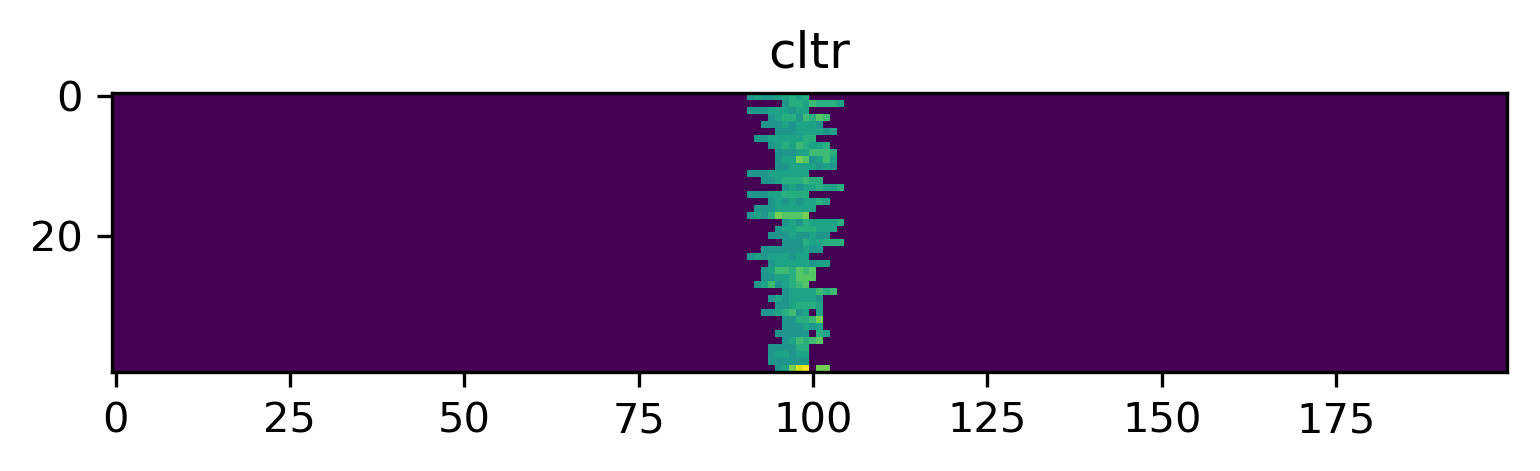

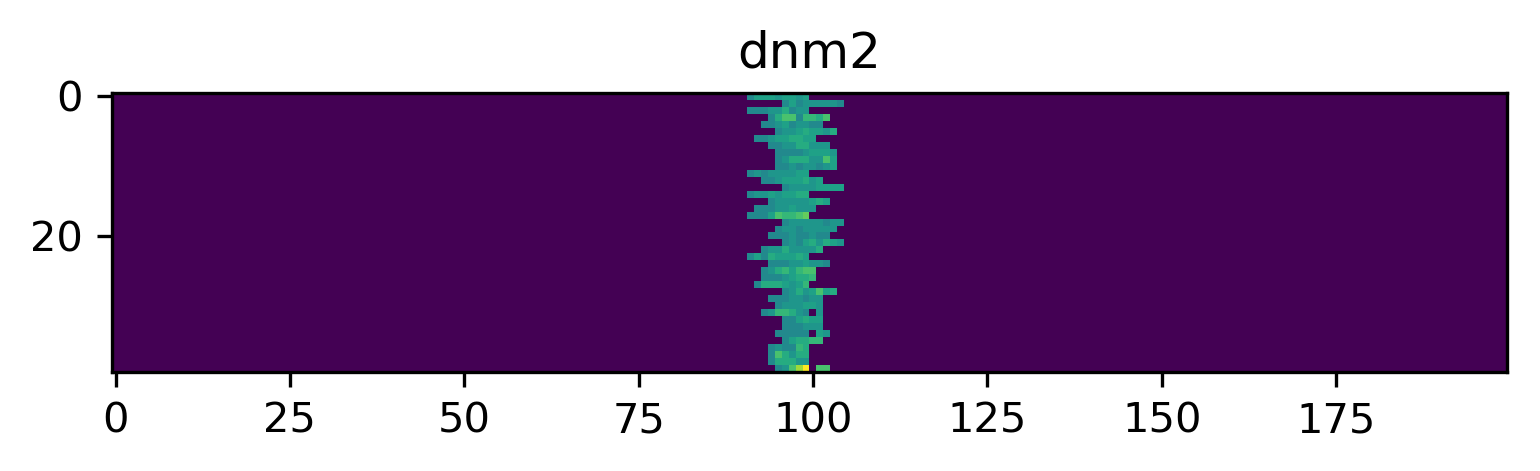

In [39]:
#calculate all the buffers for all cohorts
backgroundIntensity = 0

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForDistances(trackIdsAssignedToCohorts[i], -10)
    cohortBuffers.append([m_buffer,s_buffer])

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

In [48]:
def avgAllColumns_ignoreValue(twoDArray,ignoredValue,replacementValue):
    result = np.array([])
    len_ax0 = len(twoDArray)
    if(len_ax0!=0):
        len_ax1 = len(twoDArray[0])
    
        print("len_ax0 "+str(len_ax0))
        print("len_ax1 "+str(len_ax1))
        result = []
        for i in range(0,len_ax1):
    #        print(i)
            column = twoDArray[:,i]
    #        print(column)
            excludedColumn = column[column != ignoredValue]
    #        print(excludedColumn)
            if(len(excludedColumn) == 0):
                result.append(replacementValue)
            else:
                result.append(np.nanmean(excludedColumn))
        result = np.array(result)
    return result

In [49]:
def stdAllColumns_ignoreValue(twoDArray,ignoredValue,replacementValue):
    len_ax0 = len(twoDArray)
    result = np.array([])
    if(len_ax0!=0):
        len_ax1 = len(twoDArray[0])
    
        print("len_ax0 "+str(len_ax0))
        print("len_ax1 "+str(len_ax1))
        result = []
        for i in range(0,len_ax1):
    #        print(i)
            column = twoDArray[:,i]
    #        print(column)
            excludedColumn = column[column != ignoredValue]
    #        print(excludedColumn)
            if(len(excludedColumn) == 0):
                result.append(replacementValue)
            else:
                result.append(np.nanstd(excludedColumn))
        result = np.array(result)
    return result

len_ax0 40
len_ax1 200
len_ax0 40
len_ax1 200
len_ax0 4
len_ax1 200
len_ax0 4
len_ax1 200


Text(0,0.5,'distance from start [px]')

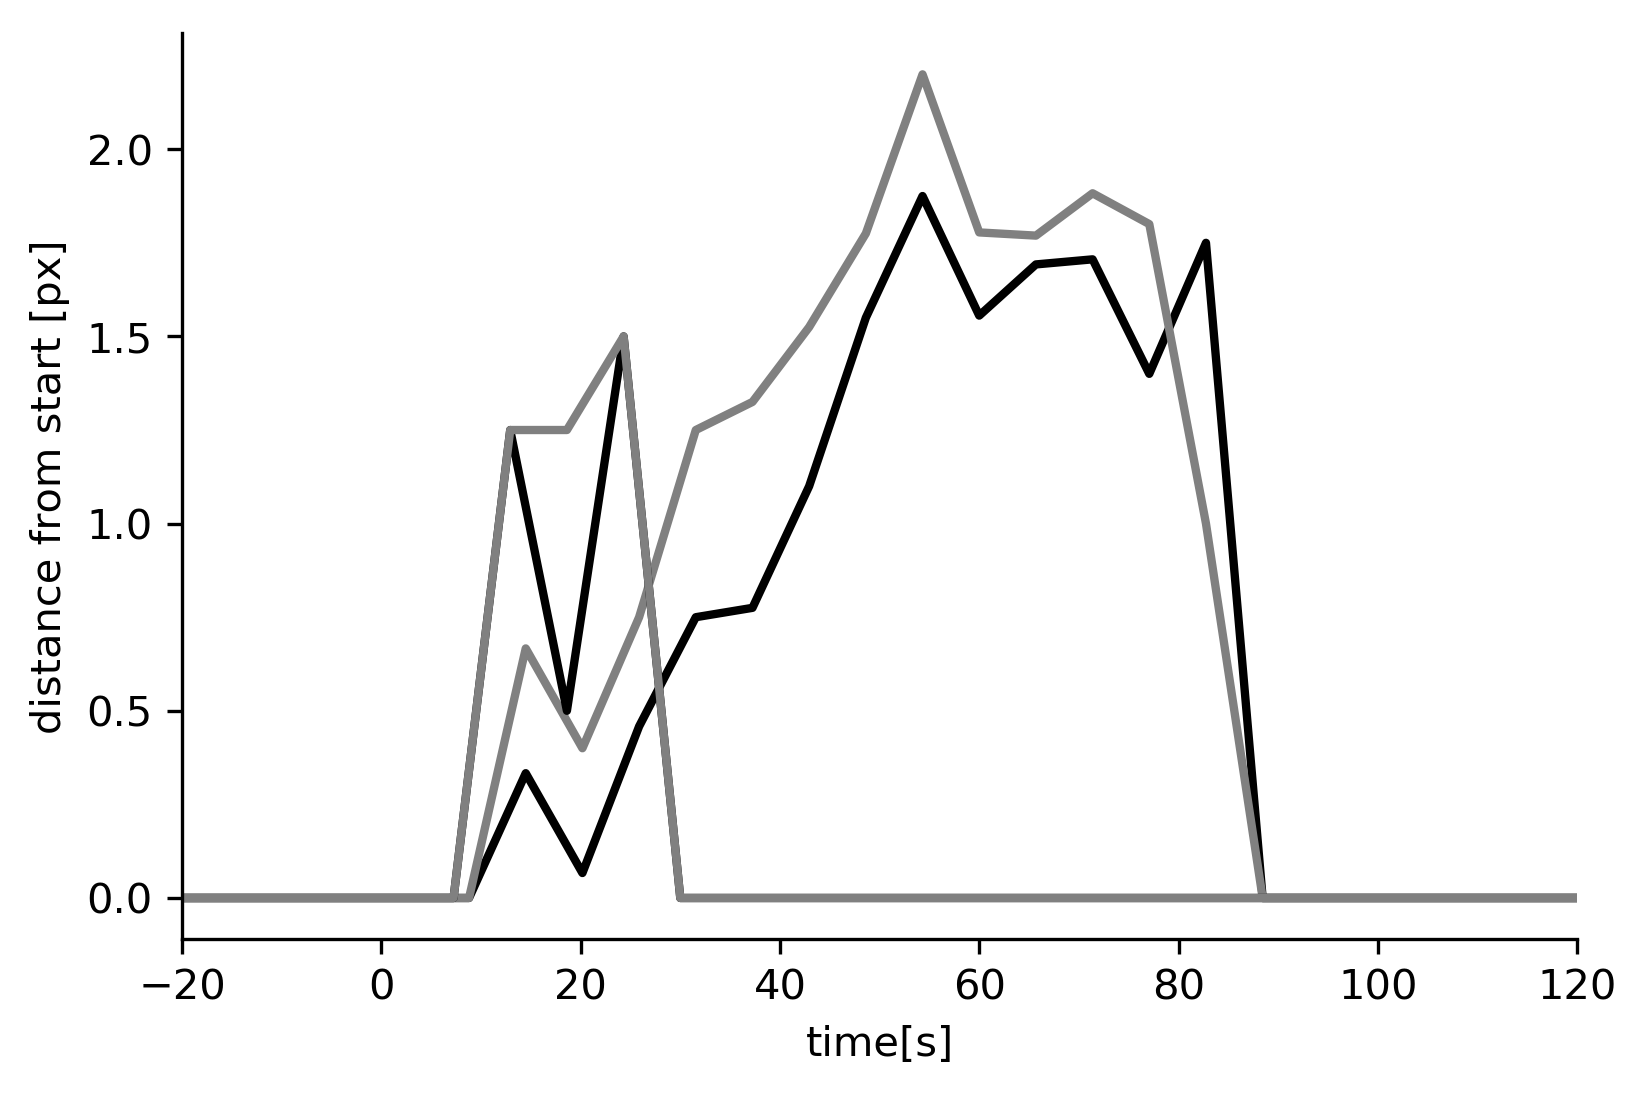

In [52]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['black','black','black','black']
s_colors = ['grey','grey','grey','grey']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


##   cohortIdx = 3
##   m_buffer,s_buffer = cohortBuffers[cohortIdx]
##   
##   m_buffer_average = avgAllColumns_ignoreValue(m_buffer,-10,0)
##   s_buffer_average = avgAllColumns_ignoreValue(s_buffer,-10,0)
##   m_buffer_std = np.nanstd(m_buffer,axis=0)
##   s_buffer_std = np.nanstd(s_buffer,axis=0)
##   time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]
##   
##   plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
##   #plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)
##   
##   plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
##   #plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)
##   
##   #--------
##   
##   cohortIdx = 2
##   m_buffer,s_buffer = cohortBuffers[cohortIdx]
##   
##   m_buffer_average = avgAllColumns_ignoreValue(m_buffer,-10,0)
##   s_buffer_average = avgAllColumns_ignoreValue(s_buffer,-10,0)
##   m_buffer_std = np.nanstd(m_buffer,axis=0)
##   s_buffer_std = np.nanstd(s_buffer,axis=0)
##   time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]
##   
##   plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
##   #plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)
##   
##   plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
##   #plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)
##   
##   


#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,-10,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,-10,0)
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,-10,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,-10,0)
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,120)
#plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('distance from start [px]')

len_ax0 40
len_ax1 200
len_ax0 40
len_ax1 200
len_ax0 40
len_ax1 200
len_ax0 40
len_ax1 200


Text(0,0.5,'distance [px]')

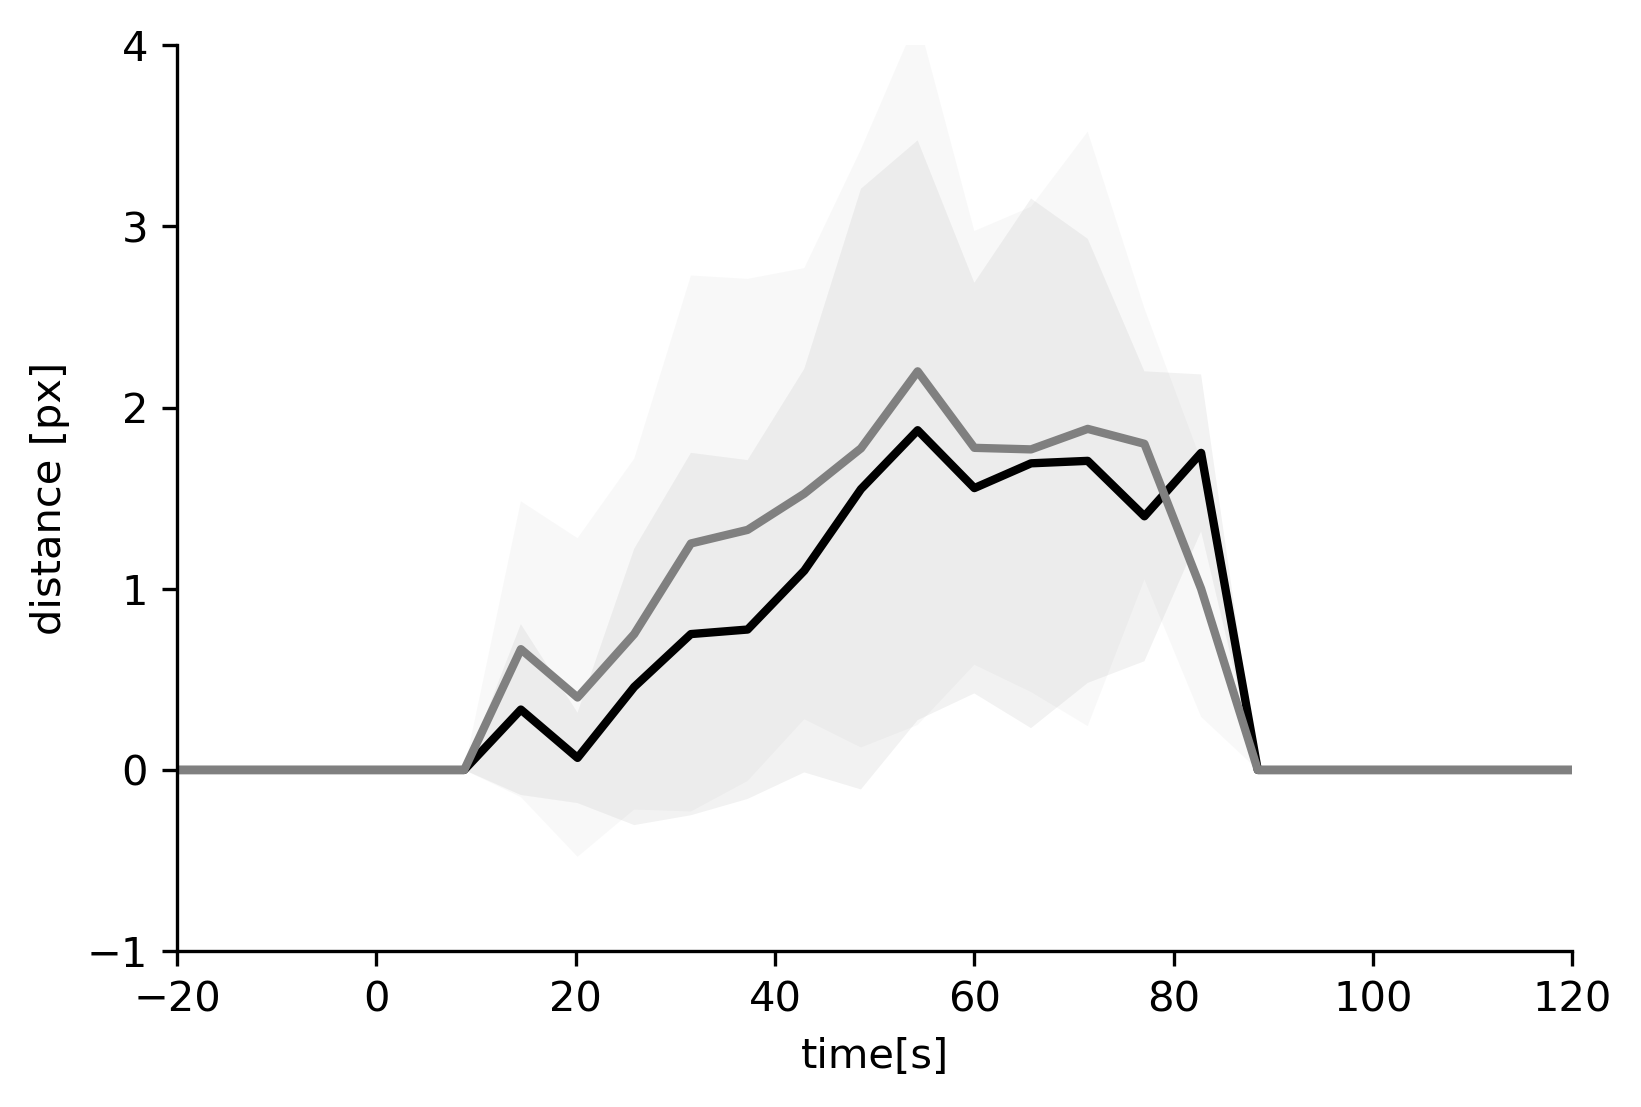

In [54]:
cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,-10,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,-10,0)
m_buffer_std = stdAllColumns_ignoreValue(m_buffer,-10,0)
s_buffer_std = stdAllColumns_ignoreValue(s_buffer,-10,0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.figure(dpi=300)
plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)


plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

plt.xlim(-20,120)
plt.ylim(-1,4)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('time[s]')
plt.ylabel('distance [px]')